**Final Project**

**Data 604 Simulation and Modeling Tech**

***Victor H Torres*** 

***07/16/2024***


Instructions
Using SimPy, write a process simulation that includes waiting time (discrete event simulation).  You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.

Each element is worth 5 points and will be graded using the rubric shown here.

1.  State the problem and its significance.

2.  Provide a flow-chart model. 

3.  Simulate the process for the appropriate number of iterations (justify)

4.  Justify the validity of the model and discuss how you verified it.

5.  State  your conclusions/ findings from the model. 

6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion. 

**I decided to work with the libraries that we used in this class Simpy, Numpy, and matplotlib for graphics, my project is going to be about a simulation of losses of a bank over a period of time, money invested in the stock market, and the value earned of an account over a 10 year period. I am also going to use a random module for this simulation.**

**This simulation would help me to have a better understanding of how applications in the financial sector works, and how to calculate the losses and earnings when working with it.**

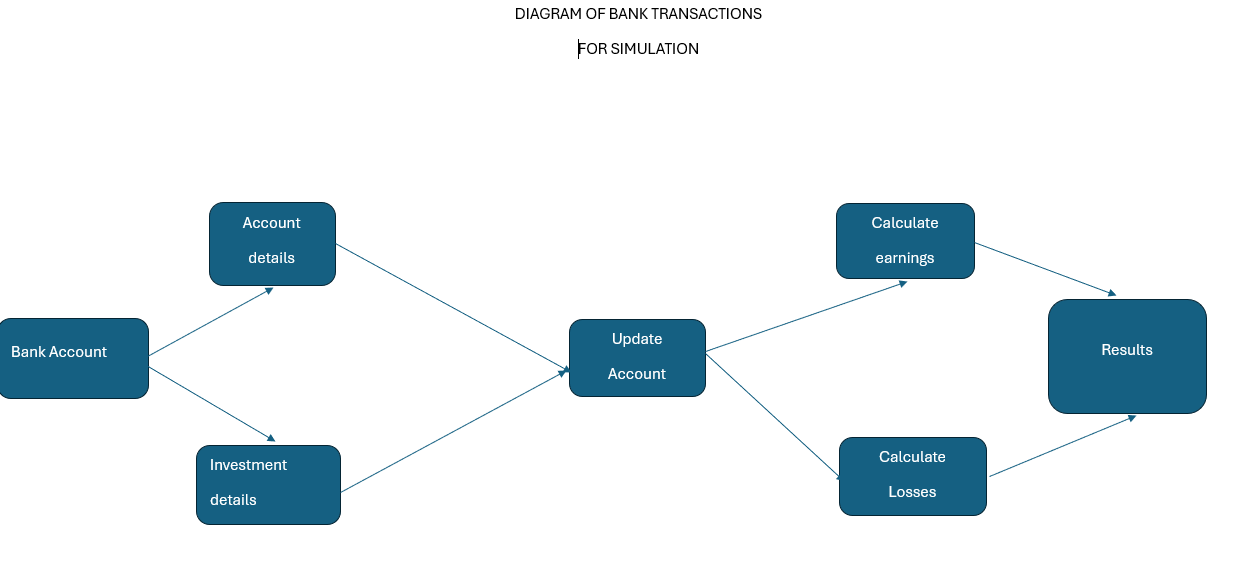

In [30]:
%matplotlib inline
from IPython.display import Image
Image("C:/Users/vitug/OneDrive/Desktop/DATA_604/diagram.png")

In [31]:
# import libraries and modules required for the project.
import simpy
import matplotlib.pyplot as plt
import numpy as np
import random

In [32]:
#Create variables for simulation.
sim_time = 120 # months

account = 0
account_history = []
timestamp = []
inflation_rate = 0.03
equity_growth = 0.07

In [33]:
# Create a function to handle equity invesments in accounts
def equity_investment(amount):
	global account
	investment = amount
	while True:
		yield env.timeout(1)
		investment_change = investment * equity_growth/12
		account = account + investment_change
		investment = investment + investment_change

In [34]:
# Create a function to handle multiple payments in accounts
def multiple_payments(loss, initial_loss, interval, occurrences):
	global account
	print ('yes')
	account = account - initial_loss
	account_history.append(account)
	timestamp.append(env.now)
	for i in range(occurrences):
		yield env.timeout(interval)
		account = account - loss

In [35]:
#Create function inflation erosion to calculate losses.
def inflation_erosion():
	global account
	while True:
		yield env.timeout(1)
		account = account - account * inflation_rate/12

In [36]:
# Function to update account
def update_account():
	while True:
		yield env.timeout(1)
		account_history.append(account)
		timestamp.append(env.now)

In [37]:
# Create funtion write risk 
def write_risk(premium, frequency, loss, category, initial_loss, interval, occurrences):
	global account
	account = account + premium
	env.process(equity_investment(premium))
	while True:
		yield env.timeout(frequency)
		if category == "multiple":
			env.process(multiple_payments(loss, initial_loss, interval, occurrences))
		elif category == "single":
			account = account - loss

In [38]:
# Function to display results
def print_results():
	global account
	while True:
		print ("\nMonth %d" % env.now)
		print ("Balance: %r " % account)
		yield env.timeout(1)

In [39]:
# setup environment
random.seed(random.random())
env = simpy.Environment()

In [40]:
# Start processes
env.process(print_results())
env.process(update_account())
env.process(inflation_erosion())
env.process(write_risk(1000000, 6, 2000, "multiple", 10000, 1, 12)) 

<Process(write_risk) object at 0x16de38c6650>

In [41]:
# Run simulation
env.run(until=sim_time)


Month 0
Balance: 0 

Month 1
Balance: 1000000 

Month 2
Balance: 1003333.3333333334 

Month 3
Balance: 1006692.3611111111 

Month 4
Balance: 1010077.2175925926 

Month 5
Balance: 1013488.0378592786 
yes

Month 6
Balance: 1006924.9578196101 

Month 7
Balance: 1008413.1142136948 

Month 8
Balance: 1009932.5821180613 

Month 9
Balance: 1011483.4876066912 

Month 10
Balance: 1013065.9576304392 

Month 11
Balance: 1014680.120021794 
yes

Month 12
Balance: 1006326.1034996687 

Month 13
Balance: 1006029.0376742199 

Month 14
Balance: 1005768.9905516957 

Month 15
Balance: 1005546.0811955626 

Month 16
Balance: 1005360.4296060211 

Month 17
Balance: 1005212.1567248653 
yes

Month 18
Balance: 995101.3844403707 

Month 19
Balance: 995053.2355922133 

Month 20
Balance: 995042.7714764186 

Month 21
Balance: 995070.1170065902 

Month 22
Balance: 995135.3980622799 

Month 23
Balance: 995238.7414940282 
yes

Month 24
Balance: 985380.2751284374 

Month 25
Balance: 985585.1277732747 

Month 26
Balance